## Profit share of Net Domestic Product vs Investment Share of Net Domestic Product

In [1]:
# Preliminaries
%matplotlib inline

import sys
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

print 'Python version: ' + '.'.join(map(str, sys.version_info[:3]))
print 'Pandas version: ' + pd.__version__

Python version: 2.7.13
Pandas version: 0.19.2


In [2]:
# Series list
series = ['A445RC1Q027SBEA', 'W273RC1Q027SBEA', 'PNFI', 'A027RC1Q027SBEA']

# Select start date:
start_date = datetime.datetime(1964,1,1)

In [3]:
# Retrieve series from Fred as pandas dataframe named df
df = web.DataReader(series, 'fred', start_date)

# Calculate share of NNP for Corporate Profits and PNFI
for s in series[:-1]:
    df[s+'_NNP'] = (df[s] / df[series[-1]] * 100).round(2)

df.rename(columns={'A445RC1Q027SBEA_NNP': 'CP before tax to NNP', 
                   'W273RC1Q027SBEA_NNP': 'CP after tax to NNP',
                   'PNFI_NNP': 'Investment to NNP'}, inplace=True)
# Select relevant columns to plot and rename them
slist = ['CP before tax to NNP', 'CP after tax to NNP', 'Investment to NNP']

df['tax_NNP'] = df[slist[0]] - df[slist[1]]

df.to_csv('cp_inv.csv')

df[df.columns[-4:-1]]

,CP before tax to NNP,CP after tax to NNP,Investment to NNP
DATE,,,
1964-01-01,12.17,7.49,11.60
1964-04-01,12.07,7.44,11.77
1964-07-01,12.03,7.38,11.94
1964-10-01,11.89,7.34,12.17
1965-01-01,12.69,8.06,12.55
1965-04-01,12.77,8.08,12.81
1965-07-01,12.69,8.04,13.00
1965-10-01,13.02,8.20,13.18
1966-01-01,13.10,8.30,13.30


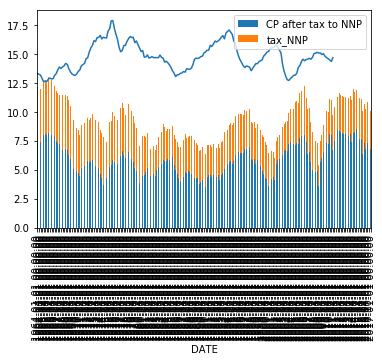

In [29]:
#df[[slist[1], 'tax_NNP']].plot(kind='bar', stacked=True, use_index = True)
#plt.xaxis_date()


ax = df[slist[2]].plot(x=df.index)
df[[slist[1], 'tax_NNP']].plot(x=df.index, kind='bar', stacked=True, ax=ax)

### Correlation between investment and corporate profit

Increases in corporate profits, either before or after tax, are not coincident with increases in private non-residential fixed investment, and are shown to be weakly negatively correlated.

In [4]:
# Simple correlations
print 'Correlation: corporate profit (after tax) share of NNP and investment share of NNP: {}'.format(
    round(df[slist[1]].corr(df[slist[2]]),2))

print 'Correlation: corporate profit (before tax) share of NNP and investment share of NNP: {}'.format(
    round(df[slist[0]].corr(df[slist[2]]),2))

print 'Correlation: corporate profit (after tax) share of NNP and investment share of NNP (one-year percent change): {}'.format(
    round(df[slist[1]].pct_change(4).corr(df[slist[2]].pct_change(4)),2))

print 'Correlation: corporate profit (before tax) share of NNP and investment share of NNP (one-year percent change): {}'.format(
    round(df[slist[0]].pct_change(4).corr(df[slist[2]].pct_change(4)),2))

Correlation: corporate profit (after tax) share of NNP and investment share of NNP: -0.3
Correlation: corporate profit (before tax) share of NNP and investment share of NNP: -0.39
Correlation: corporate profit (after tax) share of NNP and investment share of NNP (one-year percent change): -0.31
Correlation: corporate profit (before tax) share of NNP and investment share of NNP (one-year percent change): -0.22


### Plotting investment & corporate profit share of GDP

ValueError: invalid literal for float(): 1970-01-01

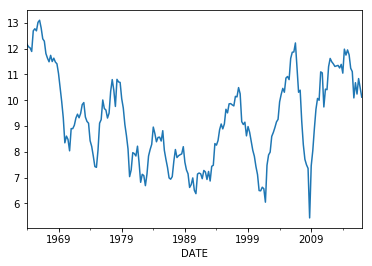

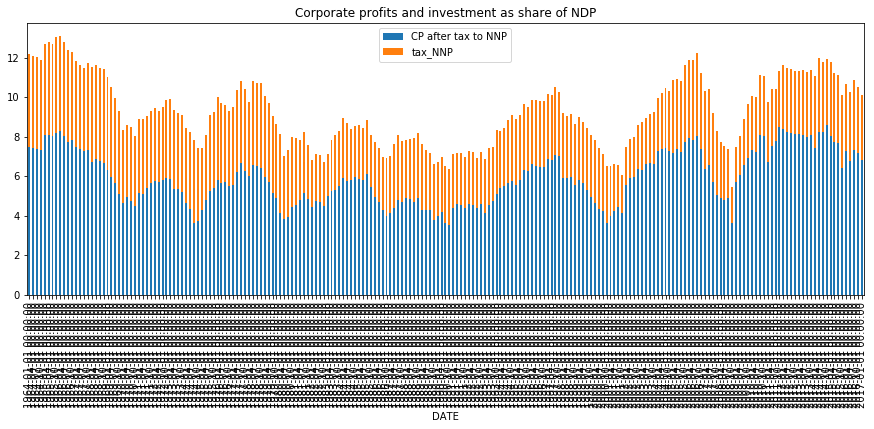

In [26]:
df[slist[0]].plot()
df[[slist[1], 'tax_NNP']].plot(figsize=(15, 5), kind='bar', stacked=True)
plt.title('Corporate profits and investment as share of NDP')
# Shaded bars indicating recessions
for i, v in pd.read_csv('rec_dates2.csv').dropna().iterrows():
    plt.axvspan(v['peak'], v['trough'], fill=True, linewidth=0, color='gray', alpha=0.2)
df[slist[0]].plot()

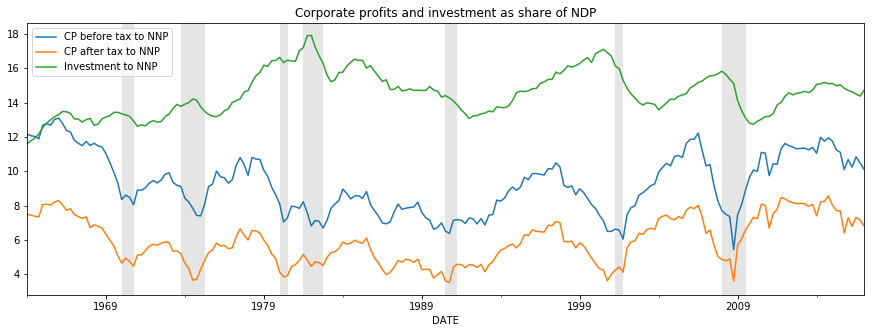

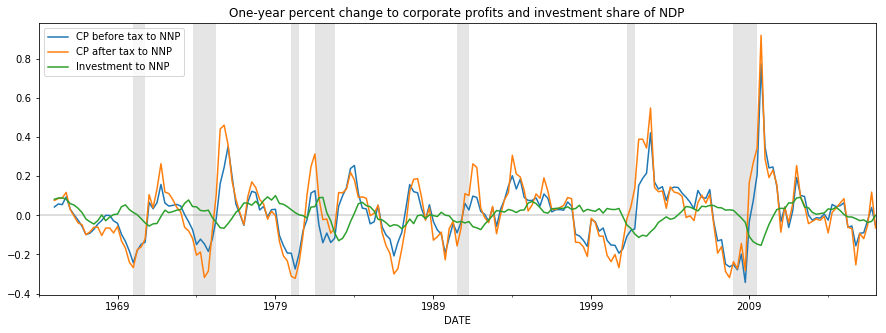

In [10]:
# Plot share of NDP first:
df[slist].plot(figsize=(15, 5), 
               title='Corporate profits and investment as share of NDP')
# Shaded bars indicating recessions
for i, v in pd.read_csv('rec_dates2.csv').dropna().iterrows():
    plt.axvspan(v['peak'], v['trough'], fill=True, linewidth=0, color='gray', alpha=0.2)

    
    
    
    
    
# Plot perent change in share of NDP:
df[slist].pct_change(4).plot(figsize=(15, 5), 
                             title='One-year percent change to corporate profits and investment share of NDP')
# Shaded bars indicating recessions
for i, v in pd.read_csv('rec_dates2.csv').dropna().iterrows():
    plt.axvspan(v['peak'], v['trough'], fill=True, linewidth=0, color='gray', alpha=0.2)
# Create a horizontal line at the origin
plt.axhline(y=0, color='lightgray', zorder=0)

### Background and related research:

2015 Paper on Corporate Profits and Economic Growth: http://www8.gsb.columbia.edu/faculty-research/sites/faculty-research/files/NALLAREDDY%20CP%20%282%29.pdf

2010 Romer and Romer AER paper: http://eml.berkeley.edu/~dromer/papers/RomerandRomerAERJune2010.pdf

SIFMA stats on average maturity at issuance for corporate bonds: http://www.sifma.org/research/statistics.aspx

